DEA of Titanic passengers dataset 

The sinking of the RMS Titanic on April 15, 1912, is one of the most infamous maritime disasters in history. During her maiden voyage, the "unsinkable" ship struck an iceberg and sank in the North Atlantic Ocean, resulting in the loss of over 1,500 lives out of the 2,224 passengers and crew on board.
This dataset has the information of the passangers including if they survived or not.

In [1]:
# Feature description

In [2]:
# 'PassengerId' - Ordered unique seriel number for the passengers.
# 'Survived' - Denotes if a passenger survived the tragedy or not. 1=Survived, 0=Not survived.
# 'Pclass' - The tickets class of the passengers. 1-First class, 2-second class and 3-third class.
# 'Name' - Name of the passengers in last name, first name format.
# 'Sex' - Gender of the passengers. 
# 'Age' - Age of the passengers.
# 'SibSp' - Number of siblings or spouse that are travelling with the passenger.
# 'Parch' - Number of parents or childern that are travelling with the passenger.
# 'Ticket' - The ticket number.
# 'Fare' - The price of the ticket.
# 'Cabin' - The cabin number allocated to the passenger.
# 'Embarked' - The city from where the passenger embarked the journey. C = Cherbourg, France. Q = Queenstown, Ireland. S = Southampton, England.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df=pd.read_csv(r"D:\Data Science\titanic.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Lets find the null values for clearing.

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# There are 177 rows where the age is not known. 
# This is a large number of rows compared to the total 891. 
# So lets find the mean age and fill the null age values with the mean age.

df[["Age"]].mean()

Age    29.699118
dtype: float64

In [10]:
df[["Age"]]= df[["Age"]].fillna(df[["Age"]].mean())

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# There are 687 Cabin rows that are empty compared to the total 891.
# This is too many rows to impute or fill.
# So we can remove it from the table as this columns is not very useful.
# df.Ticket.nunique() shows 680 unique rows. So this can also be removed.

df.drop(["Cabin","Ticket"],axis=1,inplace=True)

In [13]:
# The two rows with null Embarked data can also be removed as this is a categorical field and there is no way to impute it. 
df=df.dropna()

In [14]:
#Now there are no null values.
df.isna().sum(), df.shape

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64,
 (889, 10))

In [15]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Fare           247
Embarked         3
dtype: int64

In [16]:
#let us try to find out if there is any significance between the categorical columns Pclass, Sex, SibSp, Parch and Embarked with the survived column.

Pclass Vs Survived

In [17]:
pd.crosstab(index=df["Pclass"], columns=df["Survived"])

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


Text(0.5, 1.0, 'Pclass Vs Survived')

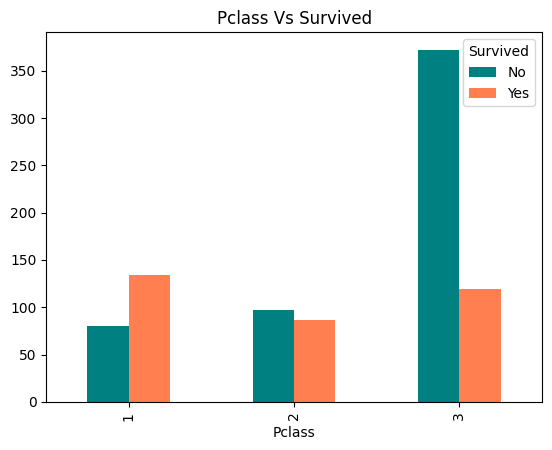

In [18]:
pd.crosstab(index=df["Pclass"], columns=df["Survived"])
pd.crosstab(index=df["Pclass"], columns=df["Survived"]).plot(kind="bar", color=(["Teal","Coral"]))
plt.legend(title="Survived", labels=["No", "Yes"])
plt.title("Pclass Vs Survived")

In [19]:
# Huge percentage of passengers from 3rd class did not survive. 1st and 2nd class was almost the same.

In [33]:
pd.crosstab(index=df["Sex"], columns=df["Survived"])

Survived,0,1
Sex,,
female,81,231
male,468,109


Sex Vs Survived

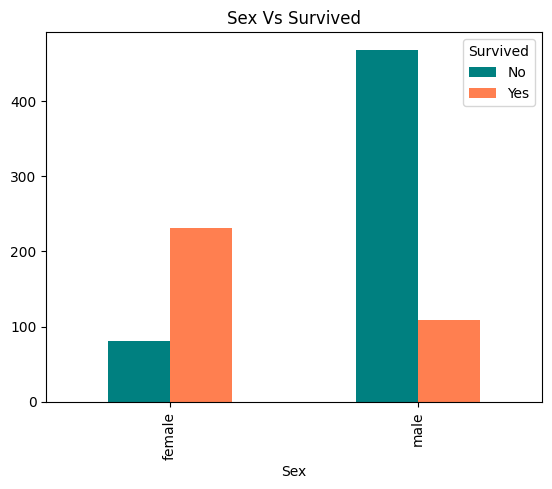

In [20]:
pd.crosstab(index=df["Sex"], columns=df["Survived"])
pd.crosstab(index=df["Sex"], columns=df["Survived"]).plot(kind="bar", color=(["Teal","Coral"]))
plt.title("Sex Vs Survived")
plt.legend(title="Survived", labels=["No", "Yes"])

In [21]:
# High percentage of male passengers died and high percentage of female passengers survived. So gender did play a role in survival.

In [34]:
pd.crosstab(index=df["SibSp"], columns=df["Survived"])

Survived,0,1
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


SibSp Vs Survived

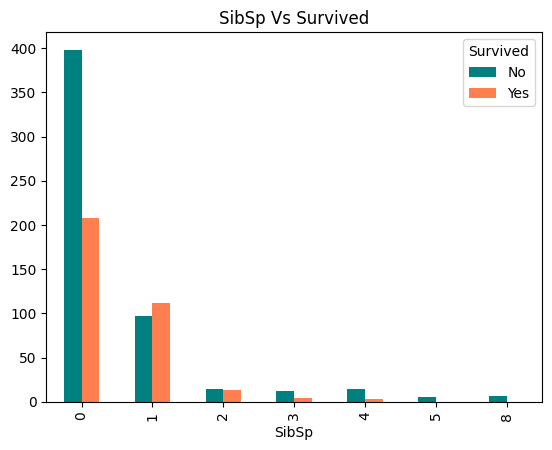

In [22]:
pd.crosstab(index=df["SibSp"], columns=df["Survived"])
pd.crosstab(index=df["SibSp"], columns=df["Survived"]).plot(kind="bar", color=(["Teal","Coral"]))
plt.title("SibSp Vs Survived")
plt.legend(title="Survived", labels=["No", "Yes"])

In [23]:
# High percentage of passengers travelling without any siblings or spouse died. 
# And, passengers travelling as a large group(4 or more people) did not survive.

In [35]:
pd.crosstab(index=df["Parch"], columns=df["Survived"])

Survived,0,1
Parch,,
0,445,231
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Parch Vs Survived

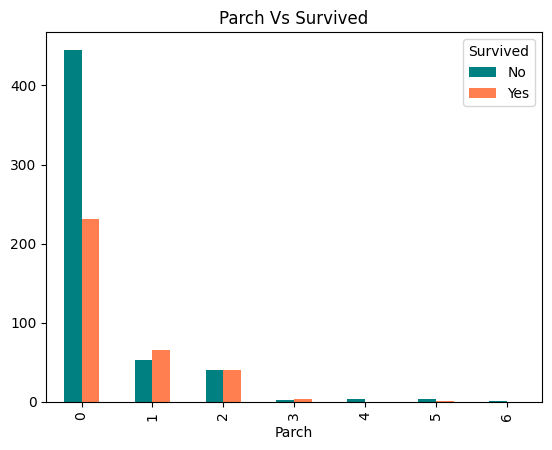

In [24]:
pd.crosstab(index=df["Parch"], columns=df["Survived"])
pd.crosstab(index=df["Parch"], columns=df["Survived"]).plot(kind="bar", color=(["Teal","Coral"]))
plt.title("Parch Vs Survived")
plt.legend(title="Survived", labels=["No", "Yes"])

In [25]:
# High percentage of passengers travelling without any children or parents died. 

In [36]:
pd.crosstab(index=df["Embarked"], columns=df["Survived"])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


Embarked Vs Survived

Text(0.5, 1.0, 'Embarked Vs Survived')

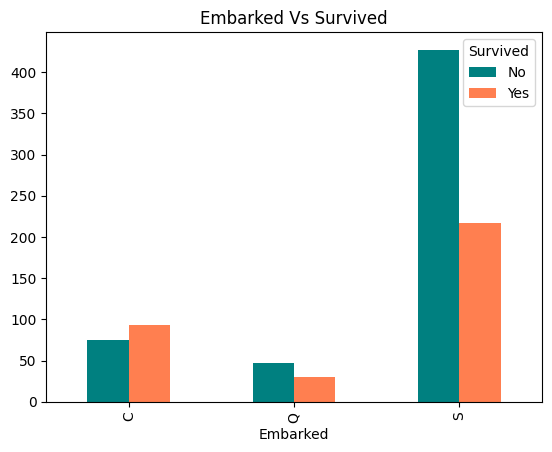

In [26]:
pd.crosstab(index=df["Embarked"], columns=df["Survived"])
pd.crosstab(index=df["Embarked"], columns=df["Survived"]).plot(kind="bar", color=(["teal", "coral"]))
plt.legend(title="Survived", labels=["No", "Yes"])
plt.title("Embarked Vs Survived")

In [27]:
#The survival rate of people travelling from Southampton, England was lesser compared to the other two places.

In [28]:
# Now lets check the columns with continuous data Age and Fare

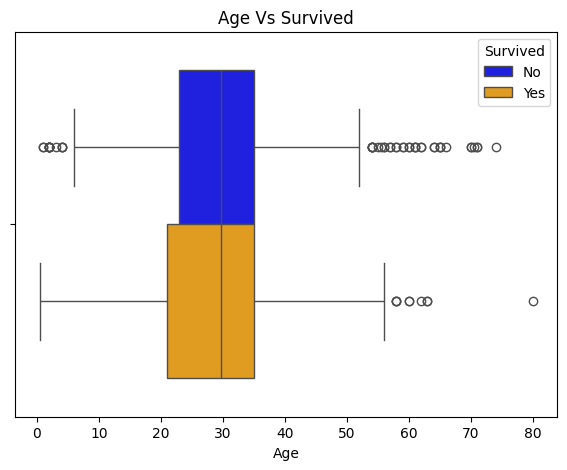

In [29]:
plt.figure(figsize=(7,5))
plt.title("Age Vs Survived")
sb.boxplot(df,x="Age", hue="Survived", palette=["blue", "orange"])
plt.legend(title="Survived", labels=["No", "Yes"])

In [30]:
# The non-survivor group has many more outliers on the higher end of the age range than the survivor group, suggesting that a larger proportion of older individuals did not survive. 
# The survivor group has one outlier to the extreme of 80 years old.

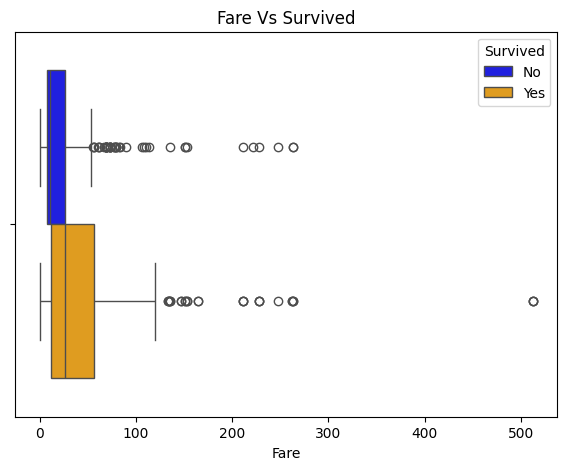

In [31]:
plt.figure(figsize=(7,5))
plt.title("Fare Vs Survived")
sb.boxplot(df,x="Fare", hue="Survived", palette=["blue", "orange"])
plt.legend(title="Survived", labels=["No", "Yes"])

In [32]:
# The median fare for survivors is noticeably higher than the median fare for non-survivors
# This suggests that passengers who paid higher fares were more likely to survive. 